## パーセプトロンの実装

In [1]:
import numpy as np
class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    ーーーーーーーーー
    eta:float
        学習率(0.0より大きく1.0より小さい)
    n_iter:int
        トレーニングデータのトレーニング回数
    random_state:int
        重みを初期化するための乱数シード
    
    
    属性
    ーーーーーーーーー
    w_:1次元配列
        適合後の重み
    errors：リスト
        各エポックでの誤分類(更新)の数
        
    """
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        """トレーニングデータに適合させる
        
        パラメータ
        ーーーーーーーーー
        X:｛配列のようなデータ構造｝,shape=[n_samples,n_features]
            トレニンーグデータ
            n_samplesはサンプルの個数、shape = [n_samples]
        y:配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        ーーーーーーーーー
        self:object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0,scale = 0.01,size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):  # トレーニング回数文トレーニングデータを反復
            errors = 0
            for xi,target in zip(X,y): #　各サンプルで重みを更新
                # 重みの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                # 重み　w0の更新
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update!=0.0)
            # 反復回数ごとの誤分類を格納
            self.errors_.append(errors)
        return self
    
    
    def net_input(self,X):
        # 総入力数を計算
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        # 1ステップ毎のクラスラベルを返す
        return np.where(self.net_input(X) >= 0.0,1,-1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数の抽出
y = df.iloc[0:100,4].values
# Iris-setosaを-1、Iris-versicolorを１
y = np.where(y == 'Iris-setosa',-1,1)
# 1-100行目の1，3行目超出
X = df.iloc[0:100,[0,2]].values
# setosaを赤の〇、varsicolorを青の×、　軸のラベルを設定
plt.scatter(X[:50,0],X[:50,1],color = 'green',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color = 'blue',marker='x',label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
# 凡例の設定
plt.legend(loc='upper left')
plt.show()

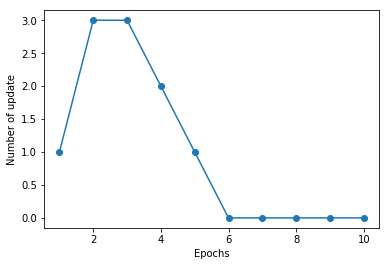

In [4]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    #　マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定境界のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))

    #各特徴量を1次元配列に変換して予測を実行する
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    # 軸の範囲の決定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y ==cl,0],
                   y=X[y == cl , 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')

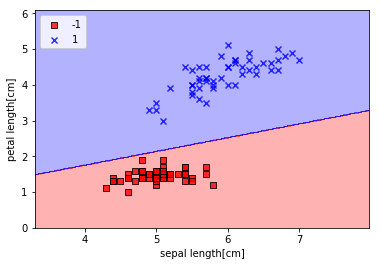

In [6]:
plot_decision_regions(X,y,classifier=ppn)

plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

## ADALINEの実装

In [7]:
import numpy as np
class AdalineGD(object):
    """ADAptive Linear NEuron の分類器
    
    パラメータ
    ーーーーーーーーー
    eta:float
        学習率(0.0より大きく1.0より小さい)
    n_iter:int
        トレーニングデータのトレーニング回数
    random_state:int
        重みを初期化するための乱数シード
    
    
    属性
    ーーーーーーーーー
    w_:1次元配列
        適合後の重み
    errors：リスト
        各エポックでの誤分類(更新)の数
        
    """
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        """トレーニングデータに適合させる
        
        パラメータ
        ーーーーーーーーー
        X:｛配列のようなデータ構造｝,shape=[n_samples,n_features]
            トレニンーグデータ
            n_samplesはサンプルの個数、shape = [n_samples]
        y:配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        ーーーーーーーーー
        self:object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0,scale = 0.01,size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):  # トレーニング回数文トレーニングデータを反復
            net_input = self.net_input(X)
            # activationは恒等関数のため何の意味もない、これをシグモイド関数にしてロジスティクス回帰にすることもできる。
            output = self.activation(net_input)
            # 誤差の計算
            errors = (y-output)
            #　w1重みの更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            # w0重みの更新
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum()/2.0
            # コストの格納
            self.cost_.append(cost)
        return self
    
    
    def net_input(self,X):
        # 総入力数を計算
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        # 1ステップ毎のクラスラベルを返す
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)

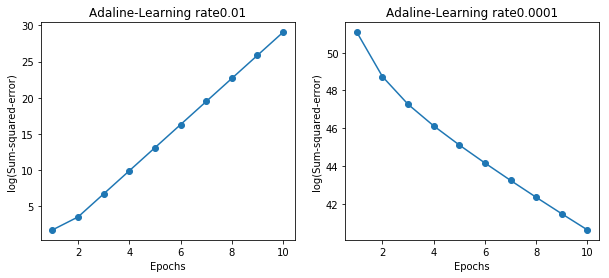

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-Learning rate0.01')
ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline-Learning rate0.0001')
plt.show()

## 特徴量のスケーリングを通じて勾配降下法を改善する
**標準化**とは、各特徴量の平均をずらして中心が0になるようにし、各特徴量の標準偏差を1にし、学習を効率的に行う手法。

In [9]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

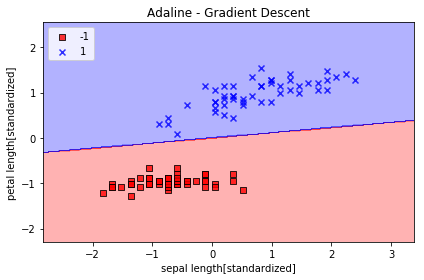

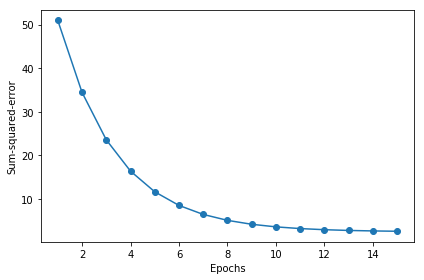

In [10]:
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length[standardized]')
plt.ylabel('petal length[standardized]')
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()

#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

## 大規模な機械学習と確率的勾配降下法
トレーニングデータセットの全体から計算されたコスト勾配とは逆方向に進むことにより、コスト関数を最小化してきた。これを**バッチ勾配降下法(batchgradient descent)**という。1ステップごとにトレーニングデータ全体を計算しているため計算コストが高い。

その代わりによく使われるのが**確率的勾配降下法(stochasticgradient descent)**である。確率的勾配降下法はトレーニングデータサンプル毎に段階的に重みを更新する。そのため計算コストが低い。

In [12]:
"""""
失敗プログラム

from numpy.random import seed

class AdalineSGD(object):
    "ADPtive LInear NEuron分類器
    
    パラメータ
    --------------------
   eta:float
        学習率(0.0より大きく1.0より小さい)
    n_iter:int
        トレーニングデータのトレーニング回数
    random_state:int
        重みを初期化するための乱数シード
    
    
    属性
    ーーーーーーーーー
    w_:1次元配列
        適合後の重み
    errors：リスト
        各エポックでの誤分類(更新)の数
        
    ""
    
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self,X,y):
        #　重みベクトルの生成
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        #　トレーニングデータ回数分トレーニングデータを反復
        for i in range(self.n_iter):
            #　指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            # サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def patial_fit(self,X,y):
        # 重みを初期化することなくトレーニングデータに適合させる
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            # 目的変数yの要素数が2以上の場合は、各サンプルの特徴量xiと目的変数targetで重みを更新
            if y.ravel().shape[0]>1:
                for xi,target in zip(X,y):
                    self._update_weights(xi,target)
                    
            #目的変数yの要素数が1の場合はサンプル全体の特徴量Xと目的変数yで重みを更新する
            else:
                self._update_weights(X,y)
            return self
        
    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return X[r],y[r]
    
    def _initialize_weights(self,m):
        # 重みを小さな乱数に初期化
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale=0.01,size=1+m)
        self.w_initialized = True
        
    def _update_weights(self,xi,target):
        #  ADALINEの学習規則を用いて重みを更新
        # 活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        
        # 誤差の計算
        error = (target-output)
        
        #重みw1の更新
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0:] += self.eta * error
        cost = 0.5*error**2
        return cost
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,y):
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)
        
"""

'""\n失敗プログラム\n\nfrom numpy.random import seed\n\nclass AdalineSGD(object):\n    "ADPtive LInear NEuron分類器\n    \n    パラメータ\n    --------------------\n   eta:float\n        学習率(0.0より大きく1.0より小さい)\n    n_iter:int\n        トレーニングデータのトレーニング回数\n    random_state:int\n        重みを初期化するための乱数シード\n    \n    \n    属性\n    ーーーーーーーーー\n    w_:1次元配列\n        適合後の重み\n    errors：リスト\n        各エポックでの誤分類(更新)の数\n        \n    ""\n    \n    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):\n        self.eta = eta\n        self.n_iter = n_iter\n        self.w_initialized = False\n        self.shuffle = shuffle\n        self.random_state = random_state\n        \n    def fit(self,X,y):\n        #\u3000重みベクトルの生成\n        self._initialize_weights(X.shape[1])\n        self.cost_ = []\n        \n        #\u3000トレーニングデータ回数分トレーニングデータを反復\n        for i in range(self.n_iter):\n            #\u3000指定された場合はトレーニングデータをシャッフル\n            if self.shuffle:\n                X,y = self._shuffle(X,y)\n       

(100, 2)


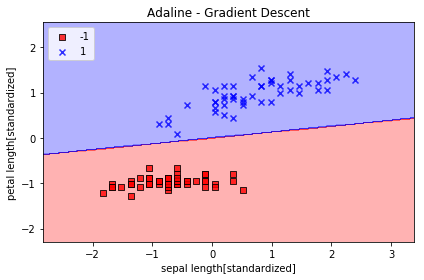

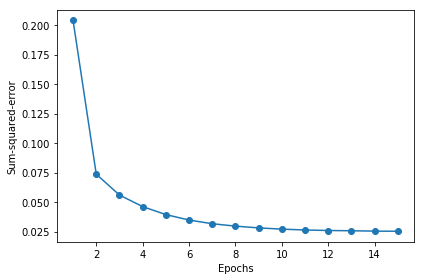

In [16]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)
print(X_std.shape)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length[standardized]')
plt.ylabel('petal length[standardized]')
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()

#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

In [14]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
        
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] >1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
        
    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return X[r],y[r]
        
    def _initialize_weights(self,m):
        # 重みを小さな乱数に初期化
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale=0.01,size=1+m)
        self.w_initialized = True
            
    def _update_weights(self,xi,target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error **2
        return cost
        
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
        
    def activation(self,X):
        return X
        
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)

# 応用偏

In [29]:
print(df.tail())
X2 = df.iloc[50:,[0,2]].values
y2 = df.iloc[50:,[4]].values

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.  3.3]
 [5.6 4.2]
 [5.7 4.2]
 [5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 

In [30]:
X2_std = np.copy(X2)
X2_std[:,0] = (X2[:,0]-X2[:,0].mean())/X2[:,0].std()
X2_std[:,1] = (X2[:,1]-X2[:,1].mean())/X2[:,1].std()

(100, 2)


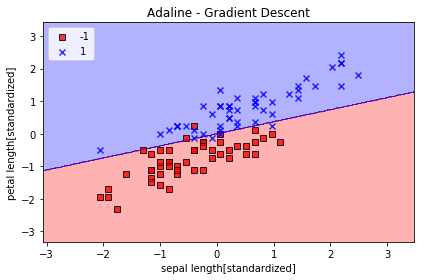

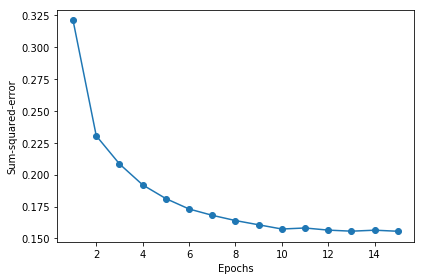

In [36]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X2_std,y)
print(X2_std.shape)
plot_decision_regions(X2_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length[standardized]')
plt.ylabel('petal length[standardized]')
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()

#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()